In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

In [2]:
path = "/kaggle/input/utkface-new/UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
26_0_2_20170104023102422.jpg.chip.jpg


In [3]:
import cv2
images = []
ages = []
genders = []
for file in files:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )

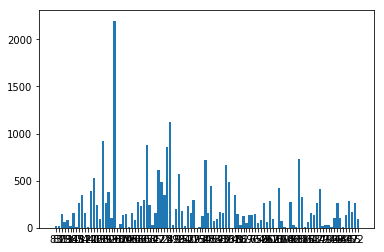

Max value: 99


In [4]:
import matplotlib.pyplot as plt
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(ages))

Gender: 0 Age: 54


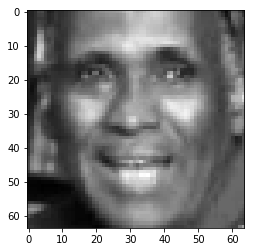

In [5]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 500
sample = images[idx]
print("Gender:",genders[idx],"Age:",ages[idx])
display(sample)

In [6]:
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

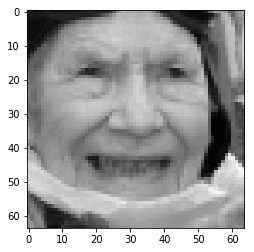

In [7]:
# pre processing
target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 4
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
display(features[550])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742


In [9]:
print("Shape of image:",sample.shape)

Shape of image: (64, 64, 1)


In [10]:
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

Using TensorFlow backend.


In [11]:
inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(256, kernel_size=(3,3), activation = 'relu')(pool2)
conv5 = Conv2D(256, kernel_size=(3,3), activation = 'relu')(conv4)
flat = Flatten()(conv5)

age_conv1 = Dense(256, activation='relu')(flat)
age_conv2 = Dense(128, activation='relu')(age_conv1)
age_conv3 = Dense(64, activation='relu')(age_conv2)
age_conv4 = Dense(32, activation='relu')(age_conv3)
age_model = Dense(1, activation='softmax')(age_conv4)


gender_conv1 = Dense(256, activation='relu')(flat)
gender_conv2 = Dense(128, activation='relu')(gender_conv1)
gender_conv3 = Dense(64, activation='relu')(gender_conv2)
gender_conv4 = Dense(32, activation='relu')(gender_conv3)
gender_conv5 = Dense(16, activation='relu')(gender_conv4)
gender_conv6 = Dense(8, activation='relu')(gender_conv5)
gender_model = Dense(1, activation='sigmoid')(gender_conv6)

In [12]:
model = Model(inputs=inputs, outputs=[age_model,gender_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [13]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 60, 60, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 30, 30, 64)   0           conv2d_2[0][0]                   
____________________________________________________________________________________________

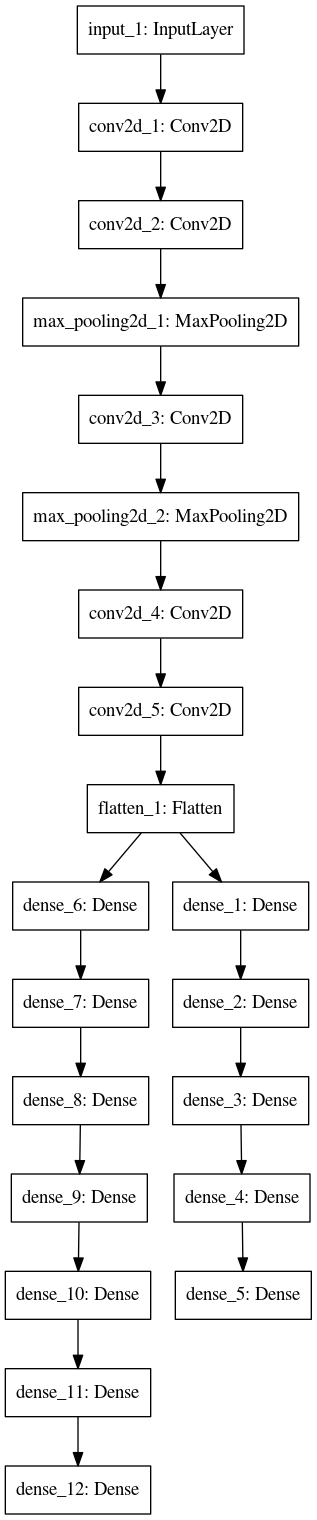

In [14]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [15]:
h = model.fit(x_train,[y_train[:,0],y_train[:,1]],
              validation_data=(x_test,[y_test[:,0],y_test[:,1]]),
              epochs = 10, batch_size=128,shuffle = True)

Train on 18966 samples, validate on 4742 samples
Epoch 1/10
18966/18966 [==============================] - 437s 23ms/step - loss: 0.8868 - dense_5_loss: 0.2107 - dense_12_loss: 0.6762 - dense_5_accuracy: 0.0278 - dense_12_accuracy: 0.5671 - val_loss: 0.7722 - val_dense_5_loss: 0.2099 - val_dense_12_loss: 0.5659 - val_dense_5_accuracy: 0.0306 - val_dense_12_accuracy: 0.7225
Epoch 2/10
18966/18966 [==============================] - 436s 23ms/step - loss: 0.6717 - dense_5_loss: 0.2111 - dense_12_loss: 0.4607 - dense_5_accuracy: 0.0278 - dense_12_accuracy: 0.7819 - val_loss: 0.5901 - val_dense_5_loss: 0.2099 - val_dense_12_loss: 0.3797 - val_dense_5_accuracy: 0.0306 - val_dense_12_accuracy: 0.8252
Epoch 3/10
18966/18966 [==============================] - 433s 23ms/step - loss: 0.5676 - dense_5_loss: 0.2110 - dense_12_loss: 0.3570 - dense_5_accuracy: 0.0278 - dense_12_accuracy: 0.8358 - val_loss: 0.5666 - val_dense_5_loss: 0.2099 - val_dense_12_loss: 0.3569 - val_dense_5_accuracy: 0.0306 - 

### Visualisation 

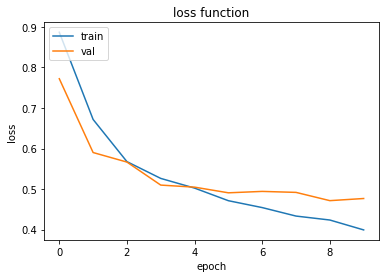

In [16]:
history = h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

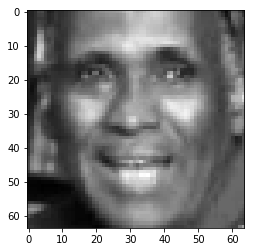

Actual Gender: Male Age: 54
Values: [array([[1.]], dtype=float32), array([[0.7993375]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 80 +


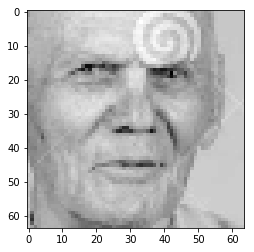

Actual Gender: Male Age: 82
Values: [array([[1.]], dtype=float32), array([[0.01221772]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 80 +


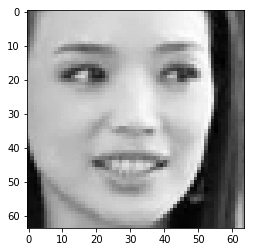

Actual Gender: Female Age: 24
Values: [array([[1.]], dtype=float32), array([[0.99454087]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 80 +


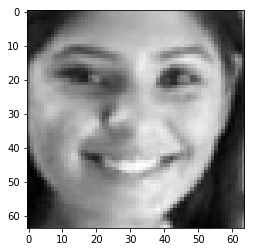

Actual Gender: Female Age: 21
Values: [array([[1.]], dtype=float32), array([[0.9615367]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 80 +


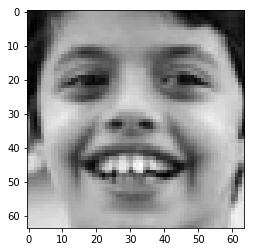

Actual Gender: Male Age: 7
Values: [array([[1.]], dtype=float32), array([[0.18846251]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 80 +


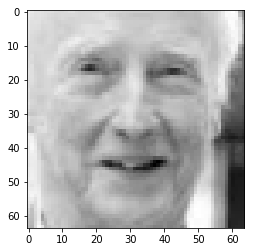

Actual Gender: Male Age: 76
Values: [array([[1.]], dtype=float32), array([[0.08911706]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 80 +


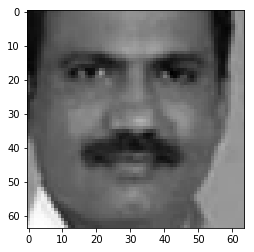

Actual Gender: Male Age: 34
Values: [array([[1.]], dtype=float32), array([[2.6919681e-06]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 80 +


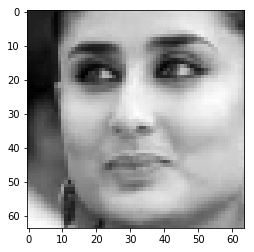

Actual Gender: Female Age: 25
Values: [array([[1.]], dtype=float32), array([[0.9785446]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 80 +


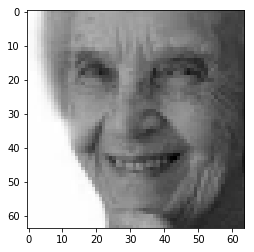

Actual Gender: Female Age: 79
Values: [array([[1.]], dtype=float32), array([[0.9748878]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 80 +


In [17]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
    
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

def get_age(distr):
    distr = distr*4
    if distr >= 0.65 and distr <= 1.4:return "0-18"
    if distr >= 1.65 and distr <= 2.4:return "19-30"
    if distr >= 2.65 and distr <= 3.4:return "31-80"
    if distr >= 3.65 and distr <= 4.4:return "80 +"
    return "Unknown"
    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    val = model.predict( np.array([sample]) )
    age = get_age(val[0][0])
    gender = get_gender(val[1][0])
    print("Values:",val,"\nPredicted Gender:",gender,"Predicted Age:",age)
    
    
indexes = [500,59,80,2,4546,7,9,256,45]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)